# Turing Machines

In [1]:
import sys
sys.path[0:0] = ['../..']        # Append to the beginning of the search path
from jove.Def_TM     import *
from jove.Def_md2mc  import *
from jove.DotBashers import *

You may use any of these help commands:
help(step_tm)
help(run_tm)
help(explore_tm)

You may use any of these help commands:
help(md2mc)
.. and if you want to dig more, then ..
help(default_line_attr)
help(length_ok_input_items)
help(union_line_attr_list_fld)
help(extend_rsltdict)
help(form_delta)
help(get_machine_components)

You may use any of these help commands:
help(ResetStNum)
help(NxtStateStr)



Generating LALR tables


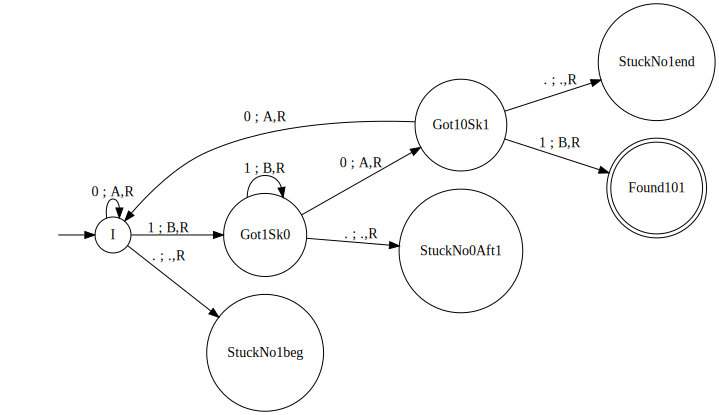

In [2]:
 # DTM to locate "101"

dtm101 = md2mc('''TM
I : 0; A, R -> I
I : 1; B, R -> Got1Sk0
I : .; ., R -> StuckNo1beg

Got1Sk0 : 1; B, R -> Got1Sk0
Got1Sk0 : .; ., R -> StuckNo0Aft1
Got1Sk0 : 0; A, R -> Got10Sk1

Got10Sk1 : 0; A, R -> I
Got10Sk1 : 1; B, R -> Found101
Got10Sk1 : .; ., R -> StuckNo1end

''')
DO_dtm101 = dotObj_tm(dtm101, FuseEdges=True)
DO_dtm101.render('dtm101')
DO_dtm101

In [3]:
explore_tm(dtm101, "00101", 10)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Found101', 5, 'AABAB', 5)
 via .. 
 ->('I', 0, '00101', 10)
 ->('I', 1, 'A0101', 9)
 ->('I', 2, 'AA101', 8)
 ->('Got1Sk0', 3, 'AAB01', 7)
 ->('Got10Sk1', 4, 'AABA1', 6)
 ->('Found101', 5, 'AABAB', 5)


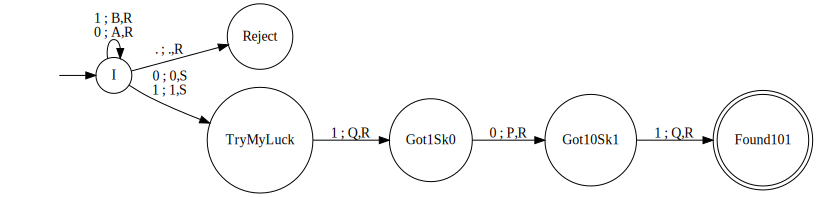

In [4]:
# NDTM to locate "101"

ndtm101 = md2mc('''TM

I : 0; A, R | 1; B, R -> I
I : 0; 0, S | 1; 1, S -> TryMyLuck

TryMyLuck : 1; Q, R -> Got1Sk0
Got1Sk0   : 0; P, R -> Got10Sk1
Got10Sk1  : 1; Q, R -> Found101

I : .; ., R -> Reject
 
''')
DO_ndtm101 = dotObj_tm(ndtm101, FuseEdges=True)
DO_ndtm101.render('ndtm101')
DO_ndtm101

In [5]:
explore_tm(ndtm101, "00101", 10)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Found101', 5, 'AAQPQ', 4)
 via .. 
 ->('I', 0, '00101', 10)
 ->('I', 1, 'A0101', 9)
 ->('I', 2, 'AA101', 8)
 ->('TryMyLuck', 2, 'AA101', 7)
 ->('Got1Sk0', 3, 'AAQ01', 6)
 ->('Got10Sk1', 4, 'AAQP1', 5)
 ->('Found101', 5, 'AAQPQ', 4)
Rejected at  ('Got1Sk0', 5, 'AABAQ', 4)
 via .. 
 ->('I', 0, '00101', 10)
 ->('I', 1, 'A0101', 9)
 ->('I', 2, 'AA101', 8)
 ->('I', 3, 'AAB01', 7)
 ->('I', 4, 'AABA1', 6)
 ->('TryMyLuck', 4, 'AABA1', 5)
 ->('Got1Sk0', 5, 'AABAQ', 4)
Rejected at  ('Reject', 6, 'AABAB........', 4)
 via .. 
 ->('I', 0, '00101', 10)
 ->('I', 1, 'A0101', 9)
 ->('I', 2, 'AA101', 8)
 ->('I', 3, 'AAB01', 7)
 ->('I', 4, 'AABA1', 6)
 ->('I', 5, 'AABAB', 5)
 ->('Reject', 6, 'AABAB........', 4)
Rejected at  ('TryMyLuck', 3, 'AAB01', 6)
 via .. 
 ->('I', 0, '00101', 10)
 ->('I', 1, 'A0101', 9)
 ->('I', 2, 'AA101', 8)
 ->('

# DTM: accepts "w#w" (markdown)

In [6]:
help(explore_tm)

Help on function explore_tm in module jove.Def_TM:

explore_tm(T, tape, nsteps)
    A handy routine to print the result of run_tm plus making 
    future extensions to explore run-results.



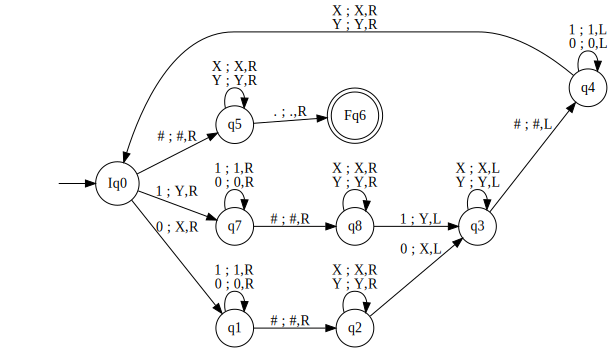

In [7]:
wpw_tm = md2mc(src='File', fname="machines/tmfiles/wpw.tm")
dotObj_tm(wpw_tm, FuseEdges=True)

In [8]:
explore_tm(wpw_tm, "001#001", 120)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('Fq6', 8, 'XXY#XXY........', 88)
 via .. 
 ->('Iq0', 0, '001#001', 120)
 ->('q1', 1, 'X01#001', 119)
 ->('q1', 2, 'X01#001', 118)
 ->('q1', 3, 'X01#001', 117)
 ->('q2', 4, 'X01#001', 116)
 ->('q3', 3, 'X01#X01', 115)
 ->('q4', 2, 'X01#X01', 114)
 ->('q4', 1, 'X01#X01', 113)
 ->('q4', 0, 'X01#X01', 112)
 ->('Iq0', 1, 'X01#X01', 111)
 ->('q1', 2, 'XX1#X01', 110)
 ->('q1', 3, 'XX1#X01', 109)
 ->('q2', 4, 'XX1#X01', 108)
 ->('q2', 5, 'XX1#X01', 107)
 ->('q3', 4, 'XX1#XX1', 106)
 ->('q3', 3, 'XX1#XX1', 105)
 ->('q4', 2, 'XX1#XX1', 104)
 ->('q4', 1, 'XX1#XX1', 103)
 ->('Iq0', 2, 'XX1#XX1', 102)
 ->('q7', 3, 'XXY#XX1', 101)
 ->('q8', 4, 'XXY#XX1', 100)
 ->('q8', 5, 'XXY#XX1', 99)
 ->('q8', 6, 'XXY#XX1', 98)
 ->('q3', 5, 'XXY#XXY', 97)
 ->('q3', 4, 'XXY#XXY', 96)
 ->('q3', 3, 'XXY#XXY', 95)
 ->('q4', 2, 'XXY#XXY', 94)
 ->('Iq0', 3, 'XXY#XXY', 93)
 ->('q5', 4, 'XXY#XXY', 92)
 ->('q5', 5, 'XXY#XXY', 91)
 ->('

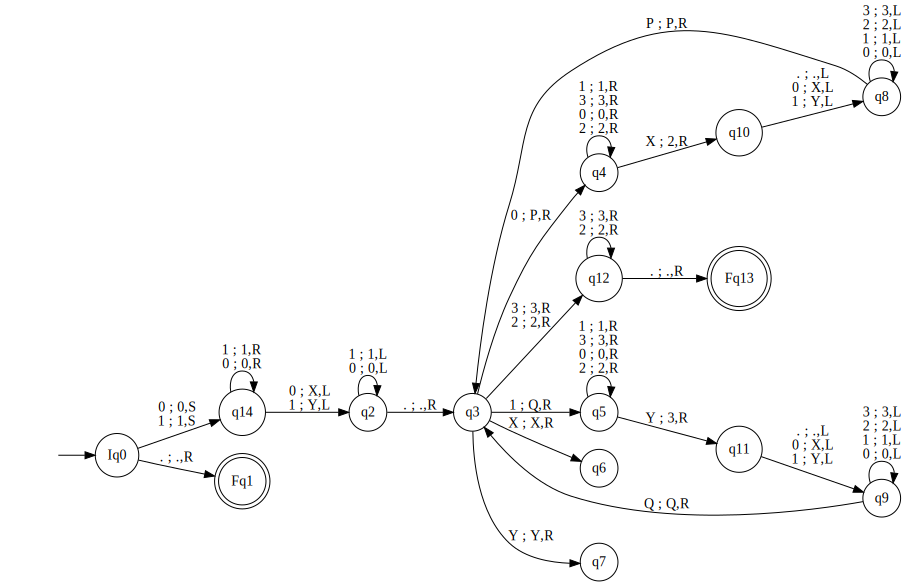

In [9]:
wwndtm_md = md2mc(src='File', fname="machines/tmfiles/wwndtm.tm")
dotObj_tm(wwndtm_md, FuseEdges=True)

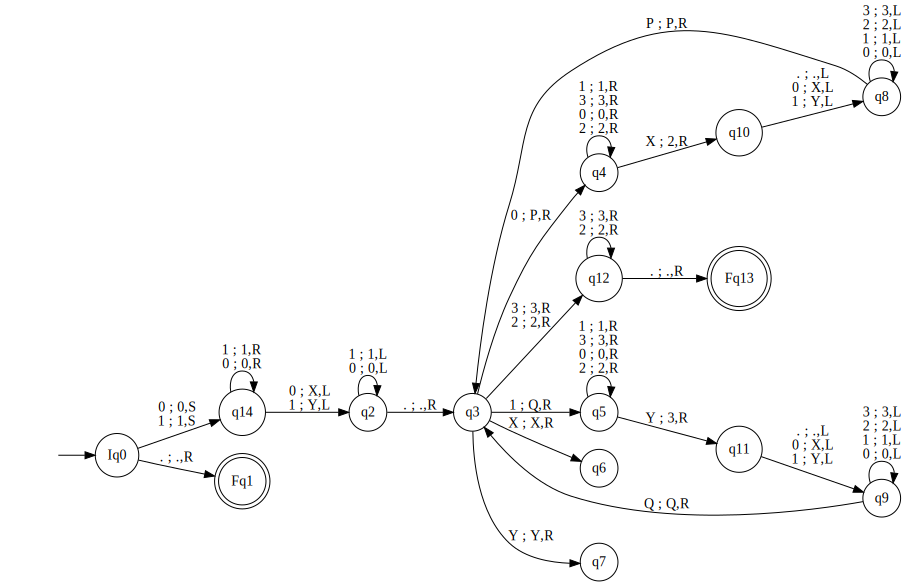

In [10]:
DOwwndtm = dotObj_tm(wwndtm_md, FuseEdges=True)
DOwwndtm.render('wwndtm')
DOwwndtm

In [11]:
explore_tm(wwndtm_md, "001001", 170)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 6, '001001', 163)
 via .. 
 ->('Iq0', 0, '001001', 170)
 ->('q14', 0, '001001', 169)
 ->('q14', 1, '001001', 168)
 ->('q14', 2, '001001', 167)
 ->('q14', 3, '001001', 166)
 ->('q14', 4, '001001', 165)
 ->('q14', 5, '001001', 164)
 ->('q14', 6, '001001', 163)
Rejected at  ('q4', 13, '........P0100Y', 152)
 via .. 
 ->('Iq0', 0, '001001', 170)
 ->('q14', 0, '001001', 169)
 ->('q14', 1, '001001', 168)
 ->('q14', 2, '001001', 167)
 ->('q14', 3, '001001', 166)
 ->('q14', 4, '001001', 165)
 ->('q14', 5, '001001', 164)
 ->('q2', 4, '00100Y', 163)
 ->('q2', 3, '00100Y', 162)
 ->('q2', 2, '00100Y', 161)
 ->('q2', 1, '00100Y', 160)
 

# DTM: accepts "w#w" (direct)

This TM is made deterministic by going to exactly one new ID (the set of next states in the transition table has a cardinality of one). We will enter the TM (called wpw) and use dotObj_tm to plot it.

In [12]:
# Example TM that recognizes w#w. We use "." to denote blanks.
# Blanks are of course user-selectable
wpw = {
 "Q": {"q0","q1","q2","q3","q4","q5","q6","q7","q8","q9","q10"},
 "Sigma" : {'0','1'},
 "Gamma" : {'0','1','X','Y','#','.'},
 "Delta" : {  
     ("q0","0") : { ("q1","X","R")},
     ("q0","#") : { ("q5","#","R")},
     ("q0","1") : { ("q7","Y","R")},
     #
     ("q1","0") : { ("q1","0","R")},     
     ("q1","1") : { ("q1","1","R")},
     ("q1","#") : { ("q2","#","R")},
     #
     ("q2","X") : { ("q2","X","R")},
     ("q2","Y") : { ("q2","Y","R")},     
     ("q2","0") : { ("q3","X","L")},
     #
     ("q3","X") : { ("q3","X","L")},  
     ("q3","Y") : { ("q3","Y","L")},
     ("q3","#") : { ("q4","#","L")}, 
     #
     ("q4","0") : { ("q4","0","L")},
     ("q4","1") : { ("q4","1","L")},     
     ("q4","X") : { ("q0","X","R")},
     ("q4","Y") : { ("q0","Y","R")},
     #
     ("q5","X") : { ("q5","X","R")},     
     ("q5","Y") : { ("q5","Y","R")},
     ("q5",".") : { ("q6",".","R")},  
     #
     ("q7","0") : { ("q7","0","R")},
     ("q7","1") : { ("q7","1","R")},     
     ("q7","#") : { ("q8","#","R")},
     #
     ("q8","X") : { ("q8","X","R")},     
     ("q8","Y") : { ("q8","Y","R")},
     ("q8","1") : { ("q9","Y","L")}, 
     #
     ("q9","X") : { ("q9","X","L")},     
     ("q9","Y") : { ("q9","Y","L")},
     ("q9","#") : { ("q10","#","L")},  
     #
     ("q10","0") : { ("q10","0","L")},     
     ("q10","1") : { ("q10","1","L")},
     ("q10","X") : { ("q0","X","R")},
     ("q10","Y") : { ("q0","Y","R")},
 },
 "q0"    : "q0",
 "B"     : '.',
 "F"     : {"q6"}
}

In [13]:
wpw

{'B': '.',
 'Delta': {('q0', '#'): {('q5', '#', 'R')},
  ('q0', '0'): {('q1', 'X', 'R')},
  ('q0', '1'): {('q7', 'Y', 'R')},
  ('q1', '#'): {('q2', '#', 'R')},
  ('q1', '0'): {('q1', '0', 'R')},
  ('q1', '1'): {('q1', '1', 'R')},
  ('q10', '0'): {('q10', '0', 'L')},
  ('q10', '1'): {('q10', '1', 'L')},
  ('q10', 'X'): {('q0', 'X', 'R')},
  ('q10', 'Y'): {('q0', 'Y', 'R')},
  ('q2', '0'): {('q3', 'X', 'L')},
  ('q2', 'X'): {('q2', 'X', 'R')},
  ('q2', 'Y'): {('q2', 'Y', 'R')},
  ('q3', '#'): {('q4', '#', 'L')},
  ('q3', 'X'): {('q3', 'X', 'L')},
  ('q3', 'Y'): {('q3', 'Y', 'L')},
  ('q4', '0'): {('q4', '0', 'L')},
  ('q4', '1'): {('q4', '1', 'L')},
  ('q4', 'X'): {('q0', 'X', 'R')},
  ('q4', 'Y'): {('q0', 'Y', 'R')},
  ('q5', '.'): {('q6', '.', 'R')},
  ('q5', 'X'): {('q5', 'X', 'R')},
  ('q5', 'Y'): {('q5', 'Y', 'R')},
  ('q7', '#'): {('q8', '#', 'R')},
  ('q7', '0'): {('q7', '0', 'R')},
  ('q7', '1'): {('q7', '1', 'R')},
  ('q8', '1'): {('q9', 'Y', 'L')},
  ('q8', 'X'): {('q8', 'X', '

In [14]:
wpwobj = dotObj_tm(wpw)

In [15]:
wwndtm = {
 "Q": {"q0","q1","q2","q3","q4","q5","q6","q7","q8","q9","q10",
       "q11","q12","q13","q14"},
 "Sigma" : {'0','1'},
 "Gamma" : {'0','1','X','Y','2','3',
            'P','Q','.'},
 "Delta" : {  
     ("q0",".") : { ("q1",".","R")},
     ("q0","0") : { ("q14","0","S")},
     ("q0","1") : { ("q14","1","S")},
     #
     ("q14","0") : { ("q14","0","R"), ('q2','X','L')},
     ("q14","1") : { ("q14","1","R"), ('q2','Y','L')},
     #
     ("q2","0") : { ("q2","0","L")},
     ("q2","1") : { ("q2","1","L")},     
     ("q2",".") : { ("q3",".","R")},
     #
     ("q3","X") : { ("q6","X","R")},  
     ("q3","Y") : { ("q7","Y","R")},
     #
     ("q3","0") : { ("q4","P","R")},
     ("q3","1") : { ("q5","Q","R")},          
     #
     ("q3","2") : { ("q12","2","R")},
     ("q3","3") : { ("q12","3","R")},
     #
     #--
     ("q4","0") : { ("q4","0","R")},
     ("q4","1") : { ("q4","1","R")},
     ("q4","2") : { ("q4","2","R")},
     ("q4","3") : { ("q4","3","R")},
     ("q4","X") : { ("q10","2","R")},     
     #
     ("q5","0") : { ("q5","0","R")},
     ("q5","1") : { ("q5","1","R")},
     ("q5","2") : { ("q5","2","R")},
     ("q5","3") : { ("q5","3","R")},
     ("q5","Y") : { ("q11","3","R")},     
     #     
     ("q10","0") : { ("q8","X","L")},     
     ("q10","1") : { ("q8","Y","L")},
     ("q10",".") : { ("q8",".","L")},
     #     
     ("q11","0") : { ("q9","X","L")},     
     ("q11","1") : { ("q9","Y","L")},
     ("q11",".") : { ("q9",".","L")},     
     #
     ("q8","0") : { ("q8","0","L")},     
     ("q8","1") : { ("q8","1","L")},
     ("q8","2") : { ("q8","2","L")},
     ("q8","3") : { ("q8","3","L")},
     ("q8","P") : { ("q3","P","R")},
     #
     ("q9","0") : { ("q9","0","L")},     
     ("q9","1") : { ("q9","1","L")},
     ("q9","2") : { ("q9","2","L")},
     ("q9","3") : { ("q9","3","L")},
     ("q9","Q") : { ("q3","Q","R")},
     #
     ("q12","2") : { ("q12","2","R")},
     ("q12","3") : { ("q12","3","R")},
     ("q12",".") : { ("q13",".","R")}
 },
 "q0"    : "q0",
 "B"     : '.',
 "F"     : {"q1","q13"}
}


In [16]:
step_tm(wpw, ("q0",0,"0#1", 3), [], set({}))

([(('q1', 1, 'X#1', 2), [('q0', 0, '0#1', 3)])], set())

In [17]:
step_tm(wwndtm, ("q14",0, "00", 100), [], set({}))

Allocating  8  tape cells to the LEFT!


([(('q14', 1, '00', 99), [('q14', 0, '00', 100)]),
  (('q2', 7, '........X0', 99), [('q14', 0, '00', 100)])],
 set())

In [18]:
run_tm(wpw, "01#01..", 19)

([],
 [(('q6', 6, 'XY#XY..', 1),
   [('q0', 0, '01#01..', 19),
    ('q1', 1, 'X1#01..', 18),
    ('q1', 2, 'X1#01..', 17),
    ('q2', 3, 'X1#01..', 16),
    ('q3', 2, 'X1#X1..', 15),
    ('q4', 1, 'X1#X1..', 14),
    ('q4', 0, 'X1#X1..', 13),
    ('q0', 1, 'X1#X1..', 12),
    ('q7', 2, 'XY#X1..', 11),
    ('q8', 3, 'XY#X1..', 10),
    ('q8', 4, 'XY#X1..', 9),
    ('q9', 3, 'XY#XY..', 8),
    ('q9', 2, 'XY#XY..', 7),
    ('q10', 1, 'XY#XY..', 6),
    ('q0', 2, 'XY#XY..', 5),
    ('q5', 3, 'XY#XY..', 4),
    ('q5', 4, 'XY#XY..', 3),
    ('q5', 5, 'XY#XY..', 2)])])

In [19]:
explore_tm(wpw, "01#01..", 19)

Detailing the halted configs now.
Accepted at  ('q6', 6, 'XY#XY..', 1)
 via .. 
 ->('q0', 0, '01#01..', 19)
 ->('q1', 1, 'X1#01..', 18)
 ->('q1', 2, 'X1#01..', 17)
 ->('q2', 3, 'X1#01..', 16)
 ->('q3', 2, 'X1#X1..', 15)
 ->('q4', 1, 'X1#X1..', 14)
 ->('q4', 0, 'X1#X1..', 13)
 ->('q0', 1, 'X1#X1..', 12)
 ->('q7', 2, 'XY#X1..', 11)
 ->('q8', 3, 'XY#X1..', 10)
 ->('q8', 4, 'XY#X1..', 9)
 ->('q9', 3, 'XY#XY..', 8)
 ->('q9', 2, 'XY#XY..', 7)
 ->('q10', 1, 'XY#XY..', 6)
 ->('q0', 2, 'XY#XY..', 5)
 ->('q5', 3, 'XY#XY..', 4)
 ->('q5', 4, 'XY#XY..', 3)
 ->('q5', 5, 'XY#XY..', 2)
 ->('q6', 6, 'XY#XY..', 1)


In [20]:
run_tm(wwndtm, "0100101001", 888)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!


([],
 [(('q14', 10, '0100101001', 877),
   [('q0', 0, '0100101001', 888),
    ('q14', 0, '0100101001', 887),
    ('q14', 1, '0100101001', 886),
    ('q14', 2, '0100101001', 885),
    ('q14', 3, '0100101001', 884),
    ('q14', 4, '0100101001', 883),
    ('q14', 5, '0100101001', 882),
    ('q14', 6, '0100101001', 881),
    ('q14', 7, '0100101001', 880),
    ('q14', 8, '0100101001', 879),
    ('q14', 9, '0100101001', 878)]),
  (('q4', 17, '........P10010100Y', 858),
   [('q0', 0, '0100101001', 888),
    ('q14', 0, '0100101001', 887),
    ('q14', 1, '0100101001', 886),
    ('q14', 2, '0100101001', 885),
    ('q14', 3, '0100101001', 884),
    ('q14', 4, '0100101001', 883),
    ('q14', 5, '0100101001', 882),
    ('q14', 6, '0100101001', 881),
    ('q14', 7, '0100101001', 880),
    ('q14', 8, '0100101001', 879),
    ('q14', 9, '0100101001', 878),
    ('q2', 8, '010010100Y', 877),
    ('q2', 7, '010010100Y', 876),
    ('q2', 6, '010010100Y', 875),
    ('q2', 5, '010010100Y', 874),
    ('q2', 4

In [21]:
explore_tm(wwndtm, "0100101001", 888)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 10, '0100101001', 877)
 via .. 
 ->('q0', 0, '0100101001', 888)
 ->('q14', 0, '0100101001', 887)
 ->('q14', 1, '0100101001', 886)
 ->('q14', 2, '0100101001', 885)
 ->('q14', 3, '0100101001', 884)
 ->('q14', 4, '0100101001', 883)
 ->('q14', 5, '0100101001', 882)
 ->('q14', 6, '0100101001', 881)
 ->('q14', 7, '0100101001', 880)
 ->('q14', 8, '0100101001', 879)
 ->('q14', 9, '0100101001', 878)
 ->('q14', 10, '0100101001', 877)
Rejecte

 ->('q11', 15, '........PQ00123001', 856)
 ->('q9', 14, '........PQ00123X01', 855)
 ->('q9', 13, '........PQ00123X01', 854)
 ->('q9', 12, '........PQ00123X01', 853)
 ->('q9', 11, '........PQ00123X01', 852)
 ->('q9', 10, '........PQ00123X01', 851)
 ->('q9', 9, '........PQ00123X01', 850)
 ->('q3', 10, '........PQ00123X01', 849)
 ->('q4', 11, '........PQP0123X01', 848)
 ->('q4', 12, '........PQP0123X01', 847)
 ->('q4', 13, '........PQP0123X01', 846)
 ->('q4', 14, '........PQP0123X01', 845)
 ->('q4', 15, '........PQP0123X01', 844)
 ->('q10', 16, '........PQP0123201', 843)
 ->('q8', 15, '........PQP01232X1', 842)
 ->('q8', 14, '........PQP01232X1', 841)
 ->('q8', 13, '........PQP01232X1', 840)
 ->('q8', 12, '........PQP01232X1', 839)
 ->('q8', 11, '........PQP01232X1', 838)
 ->('q8', 10, '........PQP01232X1', 837)
 ->('q3', 11, '........PQP01232X1', 836)
 ->('q4', 12, '........PQPP1232X1', 835)
 ->('q4', 13, '........PQPP1232X1', 834)
 ->('q4', 14, '........PQPP1232X1', 833)
 ->('q4', 15, '

In [22]:
explore_tm(wpw, "010#010", 44)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('q6', 8, 'XYX#XYX........', 12)
 via .. 
 ->('q0', 0, '010#010', 44)
 ->('q1', 1, 'X10#010', 43)
 ->('q1', 2, 'X10#010', 42)
 ->('q1', 3, 'X10#010', 41)
 ->('q2', 4, 'X10#010', 40)
 ->('q3', 3, 'X10#X10', 39)
 ->('q4', 2, 'X10#X10', 38)
 ->('q4', 1, 'X10#X10', 37)
 ->('q4', 0, 'X10#X10', 36)
 ->('q0', 1, 'X10#X10', 35)
 ->('q7', 2, 'XY0#X10', 34)
 ->('q7', 3, 'XY0#X10', 33)
 ->('q8', 4, 'XY0#X10', 32)
 ->('q8', 5, 'XY0#X10', 31)
 ->('q9', 4, 'XY0#XY0', 30)
 ->('q9', 3, 'XY0#XY0', 29)
 ->('q10', 2, 'XY0#XY0', 28)
 ->('q10', 1, 'XY0#XY0', 27)
 ->('q0', 2, 'XY0#XY0', 26)
 ->('q1', 3, 'XYX#XY0', 25)
 ->('q2', 4, 'XYX#XY0', 24)
 ->('q2', 5, 'XYX#XY0', 23)
 ->('q2', 6, 'XYX#XY0', 22)
 ->('q3', 5, 'XYX#XYX', 21)
 ->('q3', 4, 'XYX#XYX', 20)
 ->('q3', 3, 'XYX#XYX', 19)
 ->('q4', 2, 'XYX#XYX', 18)
 ->('q0', 3, 'XYX#XYX', 17)
 ->('q5', 4, 'XYX#XYX', 16)
 ->('q5', 5, 'XYX#XYX', 15)
 ->('q5', 6, 'XYX#XYX', 14)
 

In [23]:
explore_tm(wpw, "010#011", 33)

Detailing the halted configs now.
Rejected at  ('q2', 6, 'XYX#XY1', 11)
 via .. 
 ->('q0', 0, '010#011', 33)
 ->('q1', 1, 'X10#011', 32)
 ->('q1', 2, 'X10#011', 31)
 ->('q1', 3, 'X10#011', 30)
 ->('q2', 4, 'X10#011', 29)
 ->('q3', 3, 'X10#X11', 28)
 ->('q4', 2, 'X10#X11', 27)
 ->('q4', 1, 'X10#X11', 26)
 ->('q4', 0, 'X10#X11', 25)
 ->('q0', 1, 'X10#X11', 24)
 ->('q7', 2, 'XY0#X11', 23)
 ->('q7', 3, 'XY0#X11', 22)
 ->('q8', 4, 'XY0#X11', 21)
 ->('q8', 5, 'XY0#X11', 20)
 ->('q9', 4, 'XY0#XY1', 19)
 ->('q9', 3, 'XY0#XY1', 18)
 ->('q10', 2, 'XY0#XY1', 17)
 ->('q10', 1, 'XY0#XY1', 16)
 ->('q0', 2, 'XY0#XY1', 15)
 ->('q1', 3, 'XYX#XY1', 14)
 ->('q2', 4, 'XYX#XY1', 13)
 ->('q2', 5, 'XYX#XY1', 12)
 ->('q2', 6, 'XYX#XY1', 11)


In [24]:
explore_tm(wpw, "1#1", 54)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('q6', 4, 'Y#Y........', 46)
 via .. 
 ->('q0', 0, '1#1', 54)
 ->('q7', 1, 'Y#1', 53)
 ->('q8', 2, 'Y#1', 52)
 ->('q9', 1, 'Y#Y', 51)
 ->('q10', 0, 'Y#Y', 50)
 ->('q0', 1, 'Y#Y', 49)
 ->('q5', 2, 'Y#Y', 48)
 ->('q5', 3, 'Y#Y', 47)
 ->('q6', 4, 'Y#Y........', 46)


In [25]:
explore_tm(wpw, "01#01", 18)
#run_tm(wpw, "01#01", 18)

Allocating  8  tape cells to the RIGHT!
TM hasn't halted.
The truncated paths so far are as follows.
[('q0', 0, '01#01', 18), ('q1', 1, 'X1#01', 17), ('q1', 2, 'X1#01', 16), ('q2', 3, 'X1#01', 15), ('q3', 2, 'X1#X1', 14), ('q4', 1, 'X1#X1', 13), ('q4', 0, 'X1#X1', 12), ('q0', 1, 'X1#X1', 11), ('q7', 2, 'XY#X1', 10), ('q8', 3, 'XY#X1', 9), ('q8', 4, 'XY#X1', 8), ('q9', 3, 'XY#XY', 7), ('q9', 2, 'XY#XY', 6), ('q10', 1, 'XY#XY', 5), ('q0', 2, 'XY#XY', 4), ('q5', 3, 'XY#XY', 3), ('q5', 4, 'XY#XY', 2), ('q5', 5, 'XY#XY', 1)]


In [26]:
explore_tm(wpw, "010001101#010001101", 300)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('q6', 20, 'XYXXXYYXY#XYXXXYYXY........', 100)
 via .. 
 ->('q0', 0, '010001101#010001101', 300)
 ->('q1', 1, 'X10001101#010001101', 299)
 ->('q1', 2, 'X10001101#010001101', 298)
 ->('q1', 3, 'X10001101#010001101', 297)
 ->('q1', 4, 'X10001101#010001101', 296)
 ->('q1', 5, 'X10001101#010001101', 295)
 ->('q1', 6, 'X10001101#010001101', 294)
 ->('q1', 7, 'X10001101#010001101', 293)
 ->('q1', 8, 'X10001101#010001101', 292)
 ->('q1', 9, 'X10001101#010001101', 291)
 ->('q2', 10, 'X10001101#010001101', 290)
 ->('q3', 9, 'X10001101#X10001101', 289)
 ->('q4', 8, 'X10001101#X10001101', 288)
 ->('q4', 7, 'X10001101#X10001101', 287)
 ->('q4', 6, 'X10001101#X10001101', 286)
 ->('q4', 5, 'X10001101#X10001101', 285)
 ->('q4', 4, 'X10001101#X10001101', 284)
 ->('q4', 3, 'X10001101#X10001101', 283)
 ->('q4', 2, 'X10001101#X10001101', 282)
 ->('q4', 1, 'X10001101#X10001101', 281)
 ->('q4', 0, 'X10001101#X10001101', 

In [27]:
wwndtm

{'B': '.',
 'Delta': {('q0', '.'): {('q1', '.', 'R')},
  ('q0', '0'): {('q14', '0', 'S')},
  ('q0', '1'): {('q14', '1', 'S')},
  ('q10', '.'): {('q8', '.', 'L')},
  ('q10', '0'): {('q8', 'X', 'L')},
  ('q10', '1'): {('q8', 'Y', 'L')},
  ('q11', '.'): {('q9', '.', 'L')},
  ('q11', '0'): {('q9', 'X', 'L')},
  ('q11', '1'): {('q9', 'Y', 'L')},
  ('q12', '.'): {('q13', '.', 'R')},
  ('q12', '2'): {('q12', '2', 'R')},
  ('q12', '3'): {('q12', '3', 'R')},
  ('q14', '0'): {('q14', '0', 'R'), ('q2', 'X', 'L')},
  ('q14', '1'): {('q14', '1', 'R'), ('q2', 'Y', 'L')},
  ('q2', '.'): {('q3', '.', 'R')},
  ('q2', '0'): {('q2', '0', 'L')},
  ('q2', '1'): {('q2', '1', 'L')},
  ('q3', '0'): {('q4', 'P', 'R')},
  ('q3', '1'): {('q5', 'Q', 'R')},
  ('q3', '2'): {('q12', '2', 'R')},
  ('q3', '3'): {('q12', '3', 'R')},
  ('q3', 'X'): {('q6', 'X', 'R')},
  ('q3', 'Y'): {('q7', 'Y', 'R')},
  ('q4', '0'): {('q4', '0', 'R')},
  ('q4', '1'): {('q4', '1', 'R')},
  ('q4', '2'): {('q4', '2', 'R')},
  ('q4', '3'):

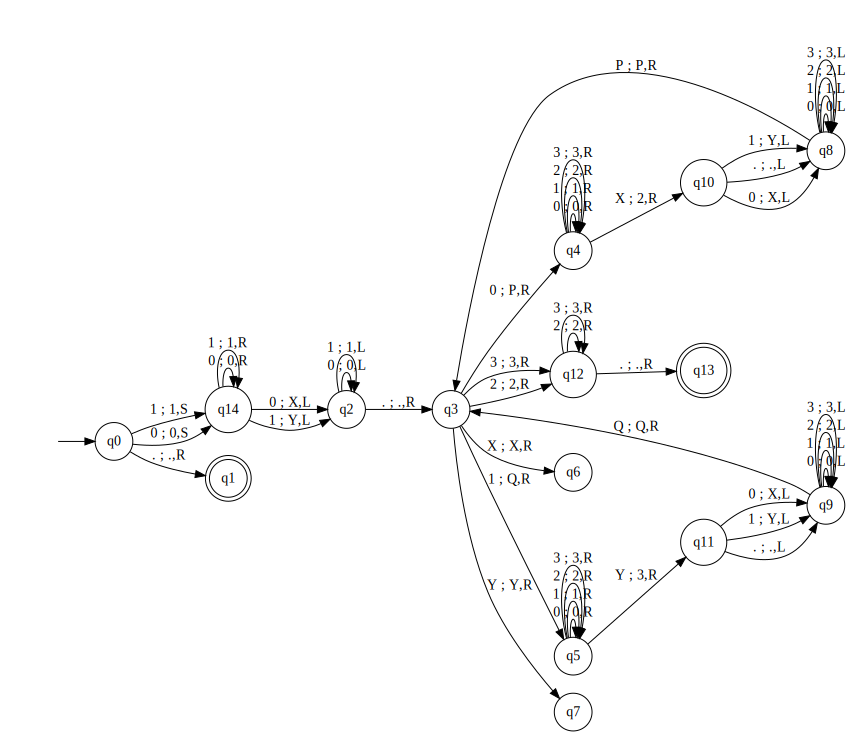

In [28]:
dotObj_tm(wwndtm)

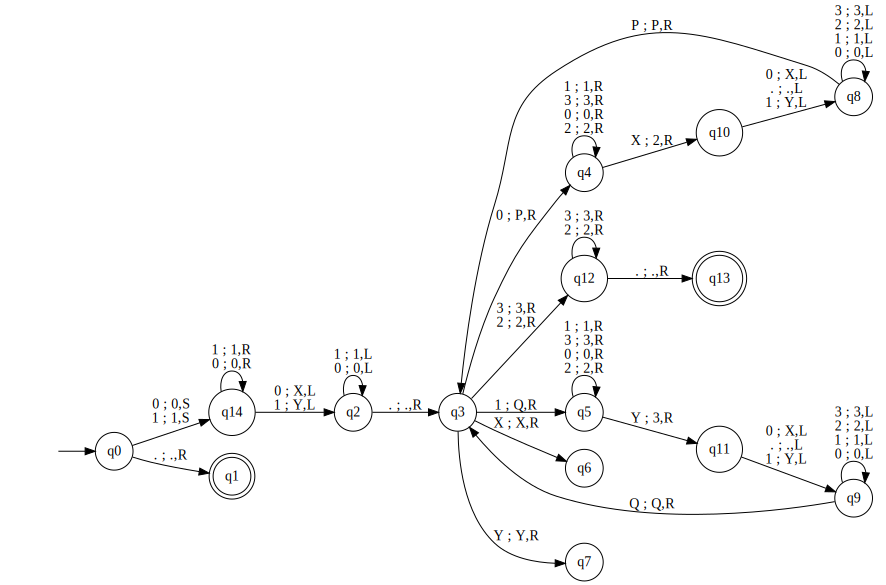

In [29]:
dotObj_tm(wwndtm, True)

In [30]:
wwndtmobj = dotObj_tm(wwndtm)

In [31]:
explore_tm(wwndtm, "010010", 88)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 6, '010010', 81)
 via .. 
 ->('q0', 0, '010010', 88)
 ->('q14', 0, '010010', 87)
 ->('q14', 1, '010010', 86)
 ->('q14', 2, '010010', 85)
 ->('q14', 3, '010010', 84)
 ->('q14', 4, '010010', 83)
 ->('q14', 5, '010010', 82)
 ->('q14', 6, '010010', 81)
Rejected at  ('q5', 14, '........PQ0012........', 57)
 via .. 
 ->('q0', 0, '010010', 88)
 ->('q14', 0, '010010', 87)
 ->('q14', 1, '010010', 86)
 ->('q14', 2, '010010', 85)
 ->('q14', 3, '010010', 84)
 ->('q14', 4, '010010', 83)
 ->('q14', 5, '010010', 82)
 ->('q2', 4, '01001X', 81)
 ->('q2', 3, '01001X', 80)
 ->('q2', 2, '01001X', 79)
 ->

In [32]:
explore_tm(wwndtm, "0101", 45)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 4, '0101', 40)
 via .. 
 ->('q0', 0, '0101', 45)
 ->('q14', 0, '0101', 44)
 ->('q14', 1, '0101', 43)
 ->('q14', 2, '0101', 42)
 ->('q14', 3, '0101', 41)
 ->('q14', 4, '0101', 40)
Rejected at  ('q4', 11, '........P10Y', 33)
 via .. 
 ->('q0', 0, '0101', 45)
 ->('q14', 0, '0101', 44)
 ->('q14', 1, '0101', 43)
 ->('q14', 2, '0101', 42)
 ->('q14', 3, '0101', 41)
 ->('q2', 2, '010Y', 40)
 ->('q2', 1, '010Y', 39)
 ->('q2', 0, '010Y', 38)
 ->('q2', 7, '........010Y', 37)
 ->('q3', 8, '........010Y', 36)
 ->('q4', 9, '........P10Y', 35)
 ->('q4', 10, '........P10Y', 34)
 ->('q4', 11, '........P10Y', 33)
Accepted at  ('q13', 13, '........PQ23........', 21)
 via .. 
 ->('q0', 0, '0101', 45)
 ->('q14', 0, '0101

In [33]:
explore_tm(wwndtm, "0100101001", 666)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 10, '0100101001', 655)
 via .. 
 ->('q0', 0, '0100101001', 666)
 ->('q14', 0, '0100101001', 665)
 ->('q14', 1, '0100101001', 664)
 ->('q14', 2, '0100101001', 663)
 ->('q14', 3, '0100101001', 662)
 ->('q14', 4, '0100101001', 661)
 ->('q14', 5, '0100101001', 660)
 ->('q14', 6, '0100101001', 659)
 ->('q14', 7, '0100101001', 658)
 ->('q14', 8, '0100101001', 657)
 ->('q14', 9, '0100101001', 656)
 ->('q14', 10, '0100101001', 655)
Rejecte

In [34]:
explore_tm(wwndtm, "0100101001", 666)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Rejected at  ('q14', 10, '0100101001', 655)
 via .. 
 ->('q0', 0, '0100101001', 666)
 ->('q14', 0, '0100101001', 665)
 ->('q14', 1, '0100101001', 664)
 ->('q14', 2, '0100101001', 663)
 ->('q14', 3, '0100101001', 662)
 ->('q14', 4, '0100101001', 661)
 ->('q14', 5, '0100101001', 660)
 ->('q14', 6, '0100101001', 659)
 ->('q14', 7, '0100101001', 658)
 ->('q14', 8, '0100101001', 657)
 ->('q14', 9, '0100101001', 656)
 ->('q14', 10, '0100101001', 655)
Rejecte

In [35]:
explore_tm(wwndtm, "0100101001", 66)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
There are still  1 truncated paths.
Detailing the halted configs now.
Rejected at  ('q14', 10, '0100101001', 55)
 via .. 
 ->('q0', 0, '0100101001', 66)
 ->('q14', 0, '0100101001', 65)
 ->('q14', 1, '0100101001', 64)
 ->('q14', 2, '0100101001', 63)
 ->('q14', 3, '0100101001', 62)
 ->('q14', 4, '0100101001', 61)
 ->('q14', 5, '0100101001', 60)
 ->('q14', 6, '0100101001', 59)
 ->('q14', 7, '0100101001', 58)
 ->('q14', 8, '0100101001', 57)
 ->('q14', 9, '0100101001', 56)
 ->('q14', 10, '0100101001', 55)
Rejected at  ('q4', 17, 

 ->('q9', 12, '........PQ023X1001', 43)
 ->('q9', 11, '........PQ023X1001', 42)
 ->('q9', 10, '........PQ023X1001', 41)
 ->('q9', 9, '........PQ023X1001', 40)
 ->('q3', 10, '........PQ023X1001', 39)
 ->('q4', 11, '........PQP23X1001', 38)
 ->('q4', 12, '........PQP23X1001', 37)
 ->('q4', 13, '........PQP23X1001', 36)
 ->('q10', 14, '........PQP2321001', 35)
 ->('q8', 13, '........PQP232Y001', 34)
 ->('q8', 12, '........PQP232Y001', 33)
 ->('q8', 11, '........PQP232Y001', 32)
 ->('q8', 10, '........PQP232Y001', 31)
 ->('q3', 11, '........PQP232Y001', 30)
 ->('q12', 12, '........PQP232Y001', 29)
 ->('q12', 13, '........PQP232Y001', 28)
 ->('q12', 14, '........PQP232Y001', 27)
Rejected at  ('q5', 11, '........PQ2X101001', 50)
 via .. 
 ->('q0', 0, '0100101001', 66)
 ->('q14', 0, '0100101001', 65)
 ->('q14', 1, '0100101001', 64)
 ->('q14', 2, '0100101001', 63)
 ->('q2', 1, '01X0101001', 62)
 ->('q2', 0, '01X0101001', 61)
 ->('q2', 7, '........01X0101001', 60)
 ->('q3', 8, '........01X01010

In [36]:
addtm = {
    # This TM adds two numbers in base 2.
    #
    # Input: matches the regex "[01][01]*\+[01][01]*"
    #        Interpreted as a+b where a and b are unsigned integers in big-endian
    #          form
    # Output: Occurs on a halt in the "done" state.
    #         The sum of the numbers in big endian form.
    #         No other characters will be on the tape.
    #         There willbe no leading zeros on the answer.
    # Errors: The only errors that can occur are input errors which lead to
    #           a halt on the "error" state. This indicates the input does
    #           not conform to the input requirement.
    # Detail: There is no length maximums on the input.
    #         The numbers can be of different lengths.
    #         Leading zeros on inputs only cause a longer runtime.
    "Q": {
        # final states
        "done", "error",

        # input validation states
        "start",
        "check_a",
        "check_b_start",
        "check_b",

        # adder states
        "read_next_b_digit",
        "0_scan_to_a",
        "1_scan_to_a",
        "n_scan_to_a",
        "0_scan_to_a_digit",
        "1_scan_to_a_digit",
        "n_scan_to_a_digit",
        "0_scan_to_output",
        "1_scan_to_output",
        "c0_scan_to_output",
        "write_carry",
        "scan_to_b",
        "scan_to_b_digit",

        # answer formatting states
        "erase_until_sum",
        "find_end_of_sum",
        "read_msb_of_sum",
        "0_check_end_of_sum",
        "1_check_end_of_sum",
        "0_write_last_digit",
        "1_write_last_digit",
        "write_last_0",
        "write_last_1",
        "0_find_end_of_sum",
        "1_find_end_of_sum",
        "0_find_answer",
        "1_find_answer",
        "write_0",
        "write_1",
        "find_start_of_sum",
        "find_start_of_answer",
        "erase_leading_zeros",
    },

    "Sigma" : {'0', '1', '+'},

    "Gamma" : {'.',
               '0', '1', '+',
               'a', # right side marker for a input
               'b', # right side marker for b input
               'c', # carry indicator
               'X', # 0 used indicator
               'Y', # 1 used indicator
               's', # left side of answer space marker
               },

    "Delta" : {
        # Begin input validation
        ("start", '.') : { ("error", '.', 'S') },
        ("start", '+') : { ("error", '.', 'S') },
        ("start", '0') : { ("check_a", '0', 'R') },
        ("start", '1') : { ("check_a", '1', 'R') },
        #
        ("check_a", '0') : { ("check_a", '0', 'R') },
        ("check_a", '1') : { ("check_a", '1', 'R') },
        ("check_a", '.') : { ("error", '.', 'S') },
        ("check_a", '+') : { ("check_b_start", 'a', 'R') },
        #
        ("check_b_start", '0') : { ("check_b", '0', 'R') },
        ("check_b_start", '1') : { ("check_b", '1', 'R') },
        ("check_b_start", '.') : { ("error", '.', 'S') },
        ("check_b_start", '+') : { ("error", '+', 'S') },
        #
        ("check_b", '0') : { ("check_b", '0', 'R') },
        ("check_b", '1') : { ("check_b", '1', 'R') },
        ("check_b", '.') : { ("read_next_b_digit", 'b', 'L') },
        ("check_b", '+') : { ("error", '+', 'S') },
        # End input validation

        # Begin adder
        ("read_next_b_digit", '0') : { ("0_scan_to_a", 'X', 'L') },
        ("read_next_b_digit", '1') : { ("1_scan_to_a", 'Y', 'L') },
        #
        ("0_scan_to_a", '0') : { ("0_scan_to_a", '0', 'L') },
        ("0_scan_to_a", '1') : { ("0_scan_to_a", '1', 'L') },
        ("0_scan_to_a", 'a') : { ("0_scan_to_a_digit", 'a', 'L') },
        #
        ("1_scan_to_a", '0') : { ("1_scan_to_a", '0', 'L') },
        ("1_scan_to_a", '1') : { ("1_scan_to_a", '1', 'L') },
        ("1_scan_to_a", 'a') : { ("1_scan_to_a_digit", 'a', 'L') },
        #
        ("n_scan_to_a", '0') : { ("n_scan_to_a", '0', 'L') },
        ("n_scan_to_a", '1') : { ("n_scan_to_a", '1', 'L') },
        ("n_scan_to_a", 'a') : { ("n_scan_to_a_digit", 'a', 'L') },
        #
        ("0_scan_to_a_digit", 'X') : { ("0_scan_to_a_digit", 'X', 'L') },
        ("0_scan_to_a_digit", 'Y') : { ("0_scan_to_a_digit", 'Y', 'L') },
        ("0_scan_to_a_digit", '0') : { ("0_scan_to_output", 'X', 'R') },
        ("0_scan_to_a_digit", '1') : { ("1_scan_to_output", 'Y', 'R') },
        ("0_scan_to_a_digit", '.') : { ("0_scan_to_output", 's', 'R') },
        ("0_scan_to_a_digit", 's') : { ("0_scan_to_output", 's', 'R') },
        #
        ("1_scan_to_a_digit", 'X') : { ("1_scan_to_a_digit", 'X', 'L') },
        ("1_scan_to_a_digit", 'Y') : { ("1_scan_to_a_digit", 'Y', 'L') },
        ("1_scan_to_a_digit", '0') : { ("1_scan_to_output", 'X', 'R') },
        ("1_scan_to_a_digit", '1') : { ("c0_scan_to_output", 'Y', 'R') },
        ("1_scan_to_a_digit", '.') : { ("1_scan_to_output", 's', 'R') },
        ("1_scan_to_a_digit", 's') : { ("1_scan_to_output", 's', 'R') },
        #
        ("n_scan_to_a_digit", 'X') : { ("n_scan_to_a_digit", 'X', 'L') },
        ("n_scan_to_a_digit", 'Y') : { ("n_scan_to_a_digit", 'Y', 'L') },
        ("n_scan_to_a_digit", '0') : { ("0_scan_to_output", 'X', 'R') },
        ("n_scan_to_a_digit", '1') : { ("1_scan_to_output", 'Y', 'R') },
        ("n_scan_to_a_digit", '.') : { ("erase_until_sum", 's', 'R') },
        ("n_scan_to_a_digit", 's') : { ("erase_until_sum", 's', 'R') },
        #
        ("0_scan_to_output", '0') : { ("0_scan_to_output", '0', 'R') },
        ("0_scan_to_output", '1') : { ("0_scan_to_output", '1', 'R') },
        ("0_scan_to_output", 'X') : { ("0_scan_to_output", 'X', 'R') },
        ("0_scan_to_output", 'Y') : { ("0_scan_to_output", 'Y', 'R') },
        ("0_scan_to_output", 'a') : { ("0_scan_to_output", 'a', 'R') },
        ("0_scan_to_output", 'b') : { ("0_scan_to_output", 'b', 'R') },
        ("0_scan_to_output", '.') : { ("scan_to_b", '0', 'L') },
        ("0_scan_to_output", 'c') : { ("scan_to_b", '1', 'L') },
        #
        ("1_scan_to_output", '0') : { ("1_scan_to_output", '0', 'R') },
        ("1_scan_to_output", '1') : { ("1_scan_to_output", '1', 'R') },
        ("1_scan_to_output", 'X') : { ("1_scan_to_output", 'X', 'R') },
        ("1_scan_to_output", 'Y') : { ("1_scan_to_output", 'Y', 'R') },
        ("1_scan_to_output", 'a') : { ("1_scan_to_output", 'a', 'R') },
        ("1_scan_to_output", 'b') : { ("1_scan_to_output", 'b', 'R') },
        ("1_scan_to_output", '.') : { ("scan_to_b", '1', 'L') },
        ("1_scan_to_output", 'c') : { ("write_carry", '0', 'R') },
        #
        ("c0_scan_to_output", '0') : { ("c0_scan_to_output", '0', 'R') },
        ("c0_scan_to_output", '1') : { ("c0_scan_to_output", '1', 'R') },
        ("c0_scan_to_output", 'X') : { ("c0_scan_to_output", 'X', 'R') },
        ("c0_scan_to_output", 'Y') : { ("c0_scan_to_output", 'Y', 'R') },
        ("c0_scan_to_output", 'a') : { ("c0_scan_to_output", 'a', 'R') },
        ("c0_scan_to_output", 'b') : { ("c0_scan_to_output", 'b', 'R') },
        ("c0_scan_to_output", '.') : { ("write_carry", '0', 'R') },
        ("c0_scan_to_output", 'c') : { ("write_carry", '1', 'R') },
        #
        ("write_carry", '.') : { ("scan_to_b", 'c', 'L') },
        #
        ("scan_to_b", '0') : { ("scan_to_b", '0', 'L') },
        ("scan_to_b", '1') : { ("scan_to_b", '1', 'L') },
        ("scan_to_b", 'b') : { ("scan_to_b_digit", 'b', 'L') },
        #
        ("scan_to_b_digit", 'X') : { ("scan_to_b_digit", 'X', 'L') },
        ("scan_to_b_digit", 'Y') : { ("scan_to_b_digit", 'Y', 'L') },
        ("scan_to_b_digit", '0') : { ("read_next_b_digit", '0', 'S') },
        ("scan_to_b_digit", '1') : { ("read_next_b_digit", '1', 'S') },
        ("scan_to_b_digit", 'a') : { ("n_scan_to_a", 'a', 'S') },
        # End adder

        # Begin answer formatting
        ("erase_until_sum", '0') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", '1') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'X') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'Y') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'a') : { ("erase_until_sum", '.', 'R') },
        ("erase_until_sum", 'b') : { ("find_end_of_sum", '.', 'R') },
        #
        ("find_end_of_sum", '0') : { ("find_end_of_sum", '0', 'R') },
        ("find_end_of_sum", '1') : { ("find_end_of_sum", '1', 'R') },
        ("find_end_of_sum", 'c') : { ("read_msb_of_sum", '1', 'S') },
        ("find_end_of_sum", '.') : { ("read_msb_of_sum", '.', 'L') },
        #
        ("read_msb_of_sum", '0') : { ("0_check_end_of_sum", '.', 'L') },
        ("read_msb_of_sum", '1') : { ("1_check_end_of_sum", '.', 'L') },
        #
        ("0_check_end_of_sum", '0') : { ("0_find_end_of_sum", '0', 'L') },
        ("0_check_end_of_sum", '1') : { ("0_find_end_of_sum", '1', 'L') },
        ("0_check_end_of_sum", '.') : { ("0_write_last_digit", '.', 'L') },
        #
        ("1_check_end_of_sum", '0') : { ("1_find_end_of_sum", '0', 'L') },
        ("1_check_end_of_sum", '1') : { ("1_find_end_of_sum", '1', 'L') },
        ("1_check_end_of_sum", '.') : { ("1_write_last_digit", '.', 'L') },
        #
        ("0_write_last_digit", '.') : { ("0_write_last_digit", '.', 'L') },
        ("0_write_last_digit", '0') : { ("write_last_0", '0', 'R') },
        ("0_write_last_digit", '1') : { ("write_last_0", '1', 'R') },
        ("0_write_last_digit", 's') : { ("write_last_0", '.', 'R') },
        #
        ("1_write_last_digit", '.') : { ("1_write_last_digit", '.', 'L') },
        ("1_write_last_digit", '0') : { ("write_last_1", '0', 'R') },
        ("1_write_last_digit", '1') : { ("write_last_1", '1', 'R') },
        ("1_write_last_digit", 's') : { ("write_last_1", '.', 'R') },
        #
        ("write_last_0", '.') : { ("find_start_of_answer", '0', 'S') },
        #
        ("write_last_1", '.') : { ("find_start_of_answer", '1', 'S') },
        #
        ("0_find_end_of_sum", '0') : { ("0_find_end_of_sum", '0', 'L') },
        ("0_find_end_of_sum", '1') : { ("0_find_end_of_sum", '1', 'L') },
        ("0_find_end_of_sum", '.') : { ("0_find_answer", '.', 'L') },
        #
        ("1_find_end_of_sum", '0') : { ("1_find_end_of_sum", '0', 'L') },
        ("1_find_end_of_sum", '1') : { ("1_find_end_of_sum", '1', 'L') },
        ("1_find_end_of_sum", '.') : { ("1_find_answer", '.', 'L') },
        #
        ("0_find_answer", '.') : { ("0_find_answer", '.', 'L') },
        ("0_find_answer", '0') : { ("write_0", '0', 'R') },
        ("0_find_answer", '1') : { ("write_0", '1', 'R') },
        ("0_find_answer", 's') : { ("write_0", '.', 'R') },
        #
        ("1_find_answer", '.') : { ("1_find_answer", '.', 'L') },
        ("1_find_answer", '0') : { ("write_1", '0', 'R') },
        ("1_find_answer", '1') : { ("write_1", '1', 'R') },
        ("1_find_answer", 's') : { ("write_1", '.', 'R') },
        #
        ("write_0", '.') : { ("find_start_of_sum", '0', 'R') },
        #
        ("write_1", '.') : { ("find_start_of_sum", '1', 'R') },
        #
        ("find_start_of_sum", '.') : { ("find_start_of_sum", '.', 'R') },
        ("find_start_of_sum", '0') : { ("find_end_of_sum", '0', 'S') },
        ("find_start_of_sum", '1') : { ("find_end_of_sum", '1', 'S') },
        #
        ("find_start_of_answer", '0') : { ("find_start_of_answer", '0', 'L') },
        ("find_start_of_answer", '1') : { ("find_start_of_answer", '1', 'L') },
        ("find_start_of_answer", '.') : { ("erase_leading_zeros", '.', 'R') },
        #
        ("erase_leading_zeros", '0') : { ("erase_leading_zeros", '.', 'R') },
        ("erase_leading_zeros", '1') : { ("done", '1', 'S') },
        ("erase_leading_zeros", '.') : { ("done", '0', 'S') },
        # End answer formatting
    },

    "q0"    : "start",

    "B"     : '.',

    "F"     : {"done"}
}

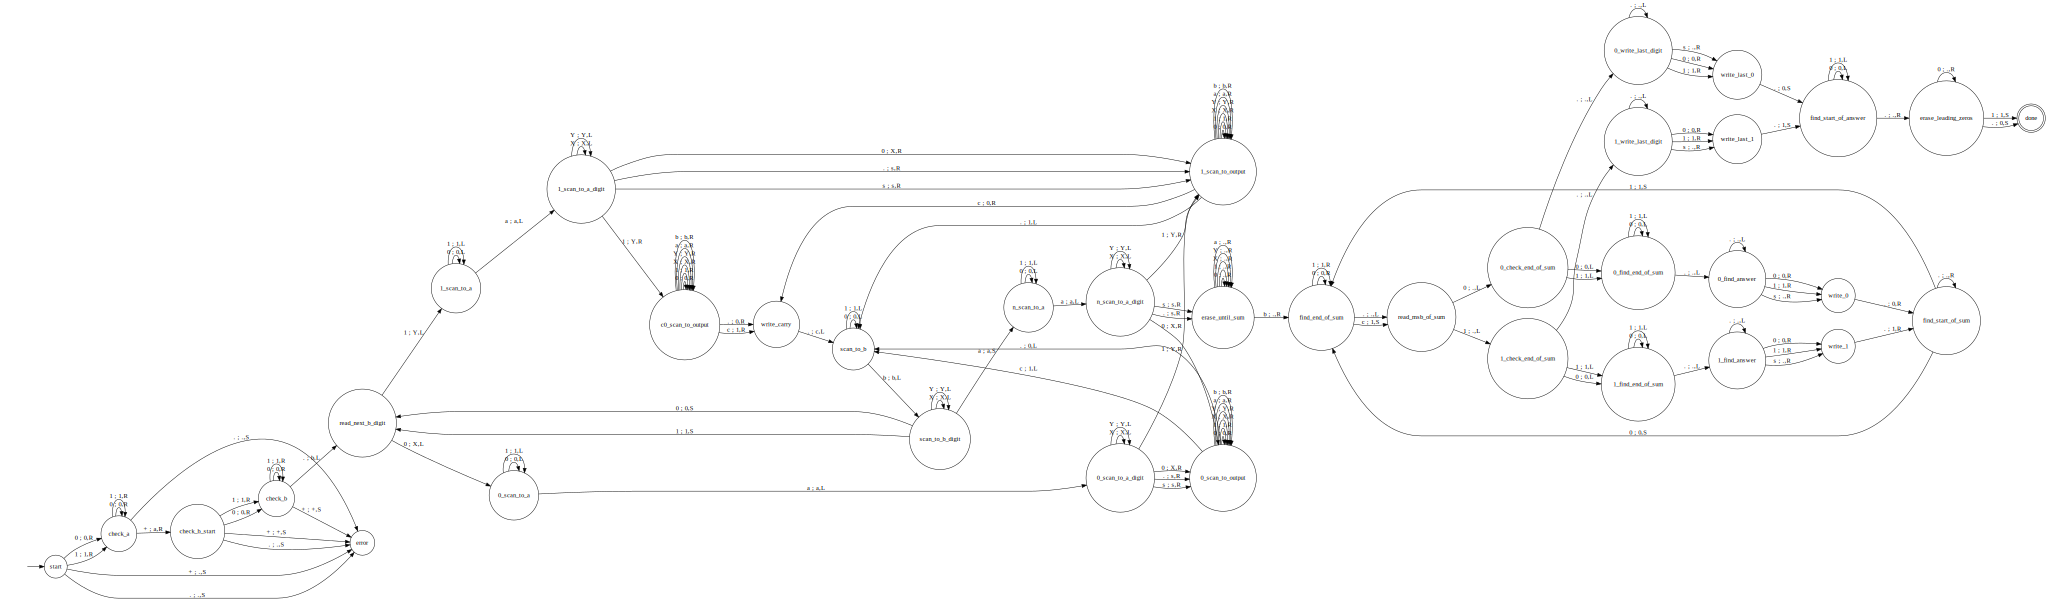

In [37]:
dotObj_tm(addtm)

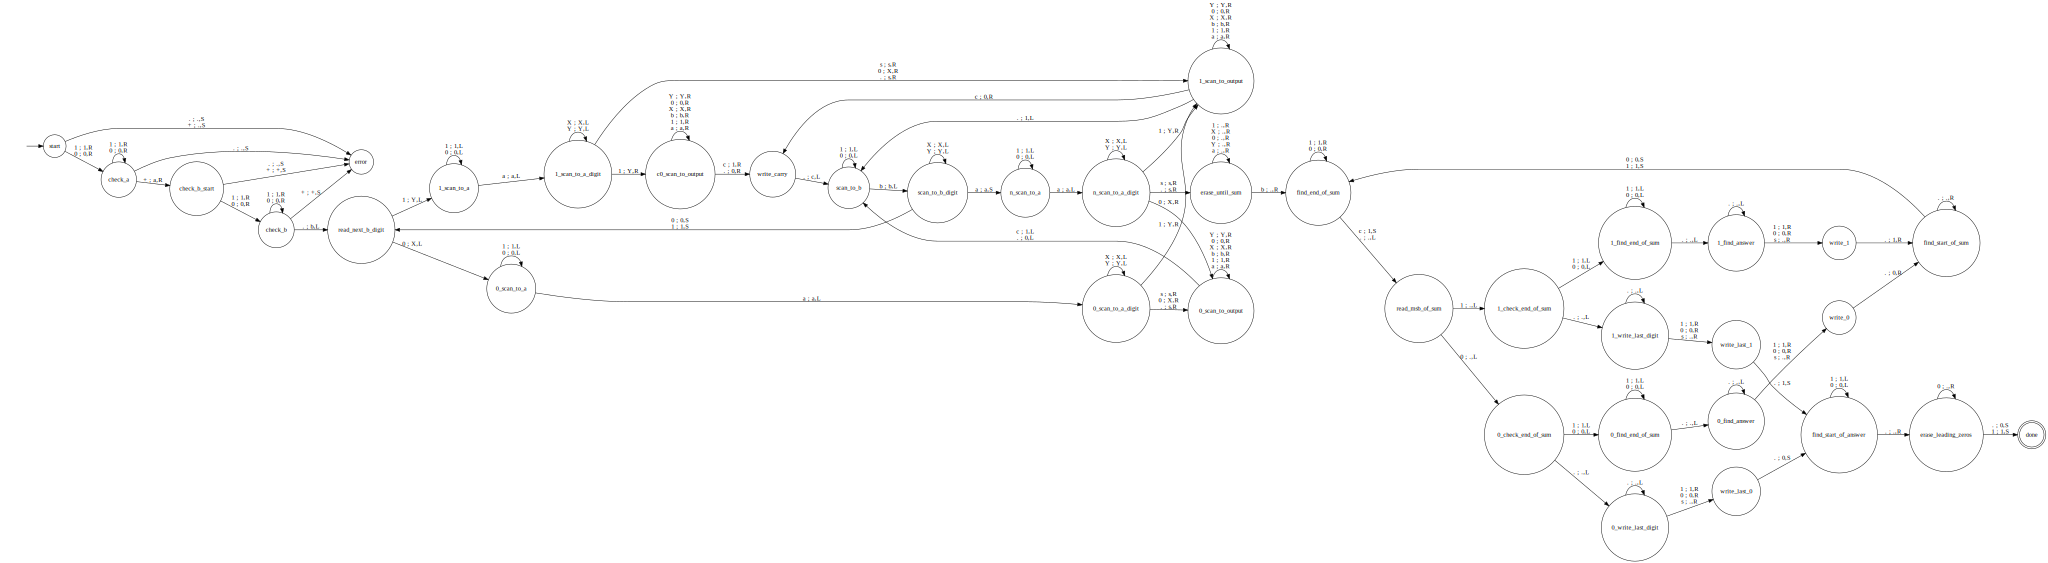

In [38]:
dotObj_tm(addtm, FuseEdges=True)

In [39]:
addtmobj = dotObj_tm(addtm)

In [40]:
explore_tm(addtm, "11111101+11111101", 735)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('done', 8, '........111111010........................', 2)
 via .. 
 ->('start', 0, '11111101+11111101', 735)
 ->('check_a', 1, '11111101+11111101', 734)
 ->('check_a', 2, '11111101+11111101', 733)
 ->('check_a', 3, '11111101+11111101', 732)
 ->('check_a', 4, '11111101+11111101', 731)
 ->('check_a', 5, '11111101+11111101', 730)
 ->('check_a', 6, '11111101+11111101', 729)
 ->('check_a', 7, '11111101+11111101', 728)
 ->('check_a', 8, '11111101+11111101', 727)
 ->('check_b_start', 9, '11111101a11111101', 726)
 ->('check_b', 10, '11111101a11111101', 725)
 ->('check_b', 11, '11111101a11111101', 724)
 ->('check_b', 12, '11111101a11111101', 723)
 ->('check_b', 13, '11111101a11111101', 722)
 ->('check_b', 14, '11111101a11111101', 721)
 ->('check_b', 15, '11111101a11111101', 720)
 ->('check_b', 16, '11111101a11111101', 719)
 ->('c

 ->('1_find_end_of_sum', 27, '.......s..................01011111.......', 355)
 ->('1_find_end_of_sum', 26, '.......s..................01011111.......', 354)
 ->('1_find_end_of_sum', 25, '.......s..................01011111.......', 353)
 ->('1_find_answer', 24, '.......s..................01011111.......', 352)
 ->('1_find_answer', 23, '.......s..................01011111.......', 351)
 ->('1_find_answer', 22, '.......s..................01011111.......', 350)
 ->('1_find_answer', 21, '.......s..................01011111.......', 349)
 ->('1_find_answer', 20, '.......s..................01011111.......', 348)
 ->('1_find_answer', 19, '.......s..................01011111.......', 347)
 ->('1_find_answer', 18, '.......s..................01011111.......', 346)
 ->('1_find_answer', 17, '.......s..................01011111.......', 345)
 ->('1_find_answer', 16, '.......s..................01011111.......', 344)
 ->('1_find_answer', 15, '.......s..................01011111.......', 343)
 ->('1_find_a

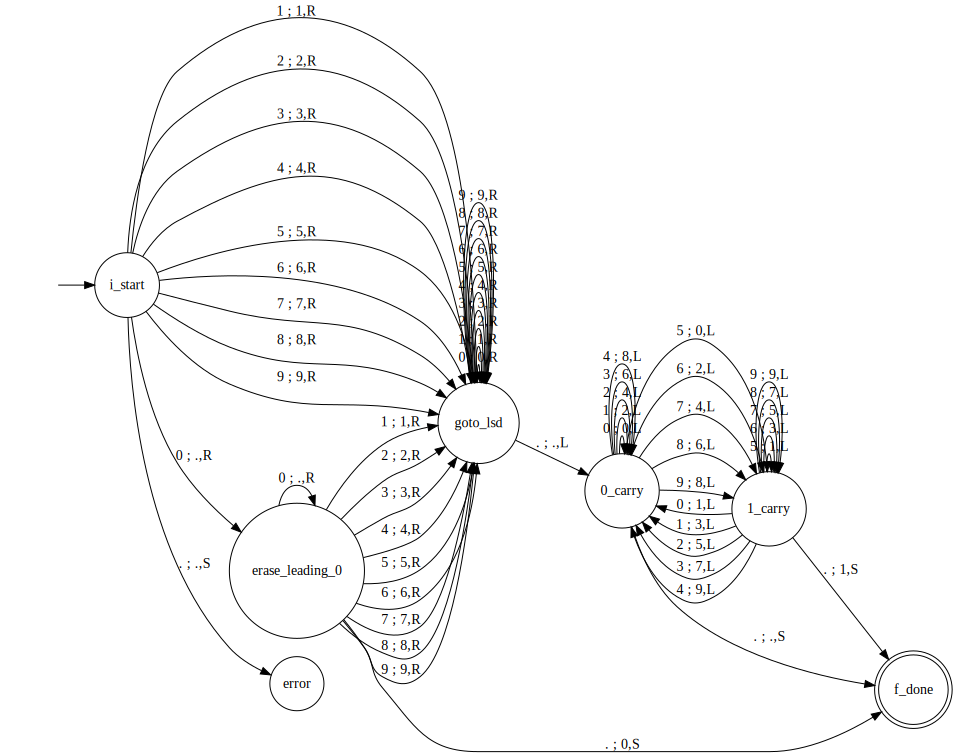

In [41]:
dec_doub = md2mc(src='File', fname='machines/tmfiles/decimal_double_tm.tm')
dotObj_tm(dec_doub)

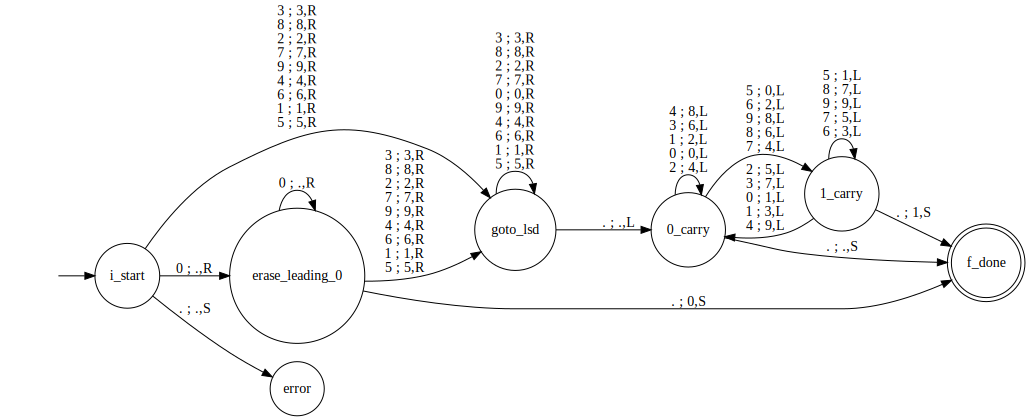

In [42]:
dotObj_tm(dec_doub, FuseEdges = True)

In [43]:
# Doubles the number given on the tape in decimal!
explore_tm(dec_doub, "231", 100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('f_done', 7, '........462........', 92)
 via .. 
 ->('i_start', 0, '231', 100)
 ->('goto_lsd', 1, '231', 99)
 ->('goto_lsd', 2, '231', 98)
 ->('goto_lsd', 3, '231', 97)
 ->('0_carry', 2, '231........', 96)
 ->('0_carry', 1, '232........', 95)
 ->('0_carry', 0, '262........', 94)
 ->('0_carry', 7, '........462........', 93)
 ->('f_done', 7, '........462........', 92)


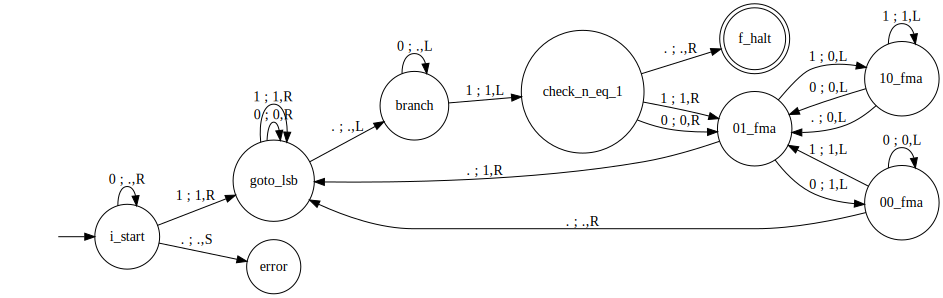

In [44]:
collatz_tm = md2mc(src='File', fname='machines/tmfiles/collatz_tm.tm')
dotObj_tm(collatz_tm)

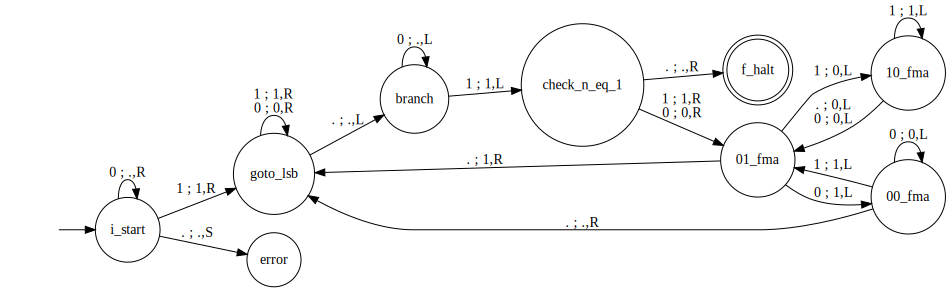

In [45]:
DOcollatz = dotObj_tm(collatz_tm, FuseEdges=True)
DOcollatz

In [46]:
DOcollatz.source

'// TO_St16\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\t"10_fma" [label="10_fma" peripheries=1 shape=circle]\n\t\tcheck_n_eq_1 [label=check_n_eq_1 peripheries=1 shape=circle]\n\t\ti_start [label=i_start peripheries=1 shape=circle]\n\t\tgoto_lsb [label=goto_lsb peripheries=1 shape=circle]\n\t\t"01_fma" [label="01_fma" peripheries=1 shape=circle]\n\t\tbranch [label=branch peripheries=1 shape=circle]\n\t\t"00_fma" [label="00_fma" peripheries=1 shape=circle]\n\t\terror [label=error peripheries=1 shape=circle]\n\t\tf_halt [label=f_halt peripheries=2 shape=circle]\n\t\t\tEMPTY -> i_start\n\t\t\ti_start -> i_start [label="0 ; .,R"]\n\t\t\ti_start -> goto_lsb [label="1 ; 1,R"]\n\t\t\ti_start -> error [label=". ; .,S"]\n\t\t\tgoto_lsb -> goto_lsb [label="1 ; 1,R \n 0 ; 0,R"]\n\t\t\tgoto_lsb -> branch [label=". ; .,L"]\n\t\t\tbranch -> branch [label="0 ; .,L"]\n\t\t\tbranch -> check_n_eq_1 [label="1 ; 1,L"]\n\t\t\tcheck_n_eq_1 -> "01_fma" [label="1 ; 1,R \n 0 ; 0,

In [47]:
# Will loop if the Collatz ("3x+1") program will ever loop!
explore_tm(collatz_tm, "0110", 100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('f_halt', 5, '.....1..............', 65)
 via .. 
 ->('i_start', 0, '0110', 100)
 ->('i_start', 1, '.110', 99)
 ->('goto_lsb', 2, '.110', 98)
 ->('goto_lsb', 3, '.110', 97)
 ->('goto_lsb', 4, '.110', 96)
 ->('branch', 3, '.110........', 95)
 ->('branch', 2, '.11.........', 94)
 ->('check_n_eq_1', 1, '.11.........', 93)
 ->('01_fma', 2, '.11.........', 92)
 ->('10_fma', 1, '.10.........', 91)
 ->('10_fma', 0, '.10.........', 90)
 ->('01_fma', 7, '........010.........', 89)
 ->('goto_lsb', 8, '.......1010.........', 88)
 ->('goto_lsb', 9, '.......1010.........', 87)
 ->('goto_lsb', 10, '.......1010.........', 86)
 ->('goto_lsb', 11, '.......1010.........', 85)
 ->('branch', 10, '.......1010.........', 84)
 ->('branch', 9, '.......101..........', 83)
 ->('check_n_eq_1', 8, '.......101..........', 82)
 ->('01_fma', 9, '.......101..........', 81)
 ->('10_fma', 8, '.

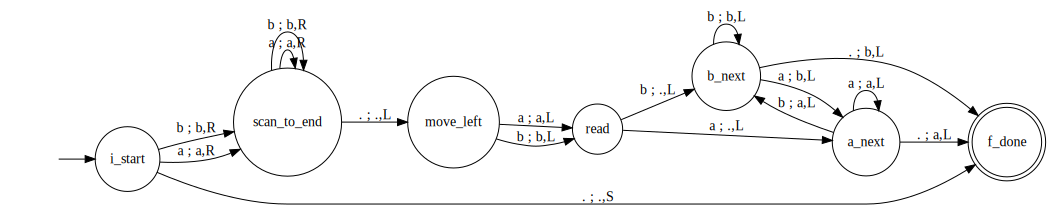

In [48]:
shiftl_tm = md2mc(src='File', fname='machines/tmfiles/shift_left_tm.tm')
dotObj_tm(shiftl_tm)

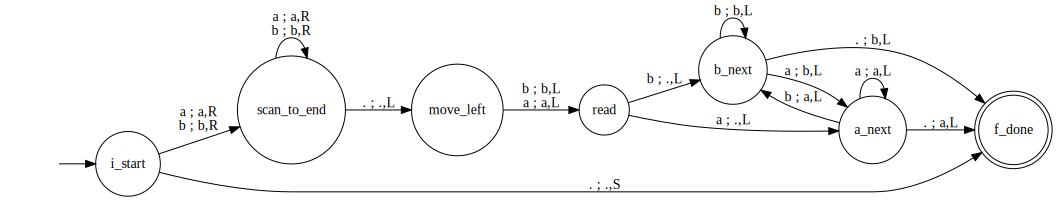

In [49]:
dotObj_tm(shiftl_tm, FuseEdges=True)

In [50]:
explore_tm(shiftl_tm, "abaaba", 100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('f_done', 6, '.......abaab.a........', 86)
 via .. 
 ->('i_start', 0, 'abaaba', 100)
 ->('scan_to_end', 1, 'abaaba', 99)
 ->('scan_to_end', 2, 'abaaba', 98)
 ->('scan_to_end', 3, 'abaaba', 97)
 ->('scan_to_end', 4, 'abaaba', 96)
 ->('scan_to_end', 5, 'abaaba', 95)
 ->('scan_to_end', 6, 'abaaba', 94)
 ->('move_left', 5, 'abaaba........', 93)
 ->('read', 4, 'abaaba........', 92)
 ->('b_next', 3, 'abaa.a........', 91)
 ->('a_next', 2, 'abab.a........', 90)
 ->('a_next', 1, 'abab.a........', 89)
 ->('b_next', 0, 'aaab.a........', 88)
 ->('a_next', 7, '........baab.a........', 87)
 ->('f_done', 6, '.......abaab.a........', 86)


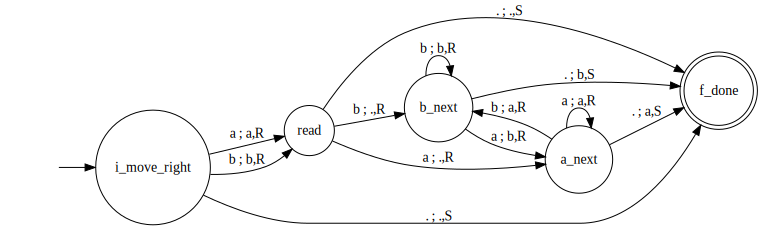

In [51]:
shiftr_tm = md2mc(src='File', fname='machines/tmfiles/shift_right_tm.tm')
dotObj_tm(shiftr_tm)

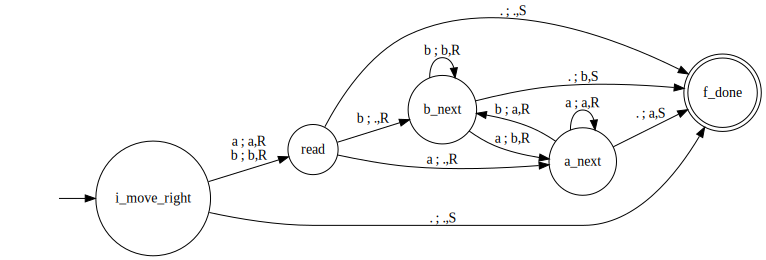

In [52]:
dotObj_tm(shiftr_tm, True)

In [53]:
explore_tm(shiftr_tm, "ababba", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('f_done', 6, 'a.babba.......', 93)
 via .. 
 ->('i_move_right', 0, 'ababba', 100)
 ->('read', 1, 'ababba', 99)
 ->('b_next', 2, 'a.abba', 98)
 ->('a_next', 3, 'a.bbba', 97)
 ->('b_next', 4, 'a.baba', 96)
 ->('b_next', 5, 'a.baba', 95)
 ->('a_next', 6, 'a.babb', 94)
 ->('f_done', 6, 'a.babba.......', 93)


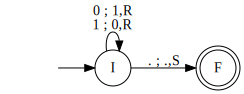

In [54]:
flipperTM = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 1, R -> I
I : 1 ; 0, R -> I
''')
DOflipperTM = dotObj_tm(flipperTM, FuseEdges=True)
DOflipperTM


In [55]:
explore_tm(flipperTM, "010011", 100)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 6, '101100........', 93)
 via .. 
 ->('I', 0, '010011', 100)
 ->('I', 1, '110011', 99)
 ->('I', 2, '100011', 98)
 ->('I', 3, '101011', 97)
 ->('I', 4, '101111', 96)
 ->('I', 5, '101101', 95)
 ->('I', 6, '101100', 94)
 ->('F', 6, '101100........', 93)


In [56]:
DOflipperTM.source

'// TO_St21\ndigraph {\n\tgraph [rankdir=LR]\n\t\tEMPTY [label="" shape=plaintext]\n\t\tI [label=I peripheries=1 shape=circle]\n\t\tF [label=F peripheries=2 shape=circle]\n\t\t\tEMPTY -> I\n\t\t\tI -> F [label=". ; .,S"]\n\t\t\tI -> I [label="0 ; 1,R \n 1 ; 0,R"]\n}'

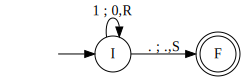

In [57]:
dtm1 = md2mc('''TM
I : . ; ., S -> F
I : 1 ; 0, R -> I
''')
DOdtm1 = dotObj_tm(dtm1, FuseEdges=True)
DOdtm1.render('dtm1')
DOdtm1

In [58]:
explore_tm(dtm1, "01", 10)

Detailing the halted configs now.
Rejected at  ('I', 0, '01', 10)
 via .. 
 ->('I', 0, '01', 10)


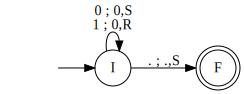

In [59]:
dtm2 = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 0, S -> I
I : 1 ; 0, R -> I
''')
DOdtm2 = dotObj_tm(dtm2, FuseEdges=True)
DOdtm2.render('dtm2')
DOdtm2

In [60]:
explore_tm(dtm2, "01", 10)

TM hasn't halted.
The truncated paths so far are as follows.
[('I', 0, '01', 10), ('I', 0, '01', 9), ('I', 0, '01', 8), ('I', 0, '01', 7), ('I', 0, '01', 6), ('I', 0, '01', 5), ('I', 0, '01', 4), ('I', 0, '01', 3), ('I', 0, '01', 2), ('I', 0, '01', 1)]


In [61]:
explore_tm(dtm2, "1", 10)

Allocating  8  tape cells to the RIGHT!
Detailing the halted configs now.
Accepted at  ('F', 1, '0........', 8)
 via .. 
 ->('I', 0, '1', 10)
 ->('I', 1, '0', 9)
 ->('F', 1, '0........', 8)


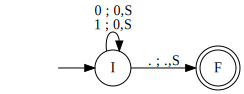

In [62]:
dtm3 = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 0, S -> I
I : 1 ; 0, S -> I
''')
DOdtm3 = dotObj_tm(dtm3, FuseEdges=True)
DOdtm3.render('dtm3')
DOdtm3

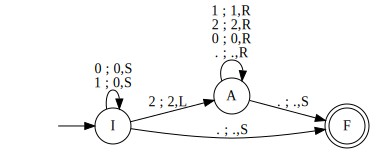

In [63]:
dtm4 = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 0, S -> I
I : 1 ; 0, S -> I
I : 2 ; 2, L -> A
A : . ; ., R -> A
A : 0;0,R | 1;1,R | 2;2,R -> A
A : .;.,S -> F
''')
DOdtm4 = dotObj_tm(dtm4, FuseEdges=True)
DOdtm4.render('dtm4')
DOdtm4

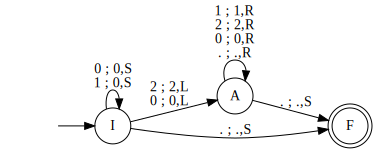

In [64]:
dtm5 = md2mc('''TM
I : . ; ., S -> F
I : 0 ; 0, S -> I
I : 0 ; 0, L -> A
I : 1 ; 0, S -> I
I : 2 ; 2, L -> A
A : . ; ., R -> A
A : 0;0,R | 1;1,R | 2;2,R -> A
A : .;.,S -> F
''')
DOdtm5 = dotObj_tm(dtm5, FuseEdges=True)
DOdtm5.render('dtm5')
DOdtm5

In [65]:
explore_tm(dtm5, "01", 10)

Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
Allocating  8  tape cells to the LEFT!
There are still  18 truncated paths.
Detailing the halted configs now.
Accepted at  ('F', 7, '........01', 8)
 via .. 
 ->('I', 0, '01', 10)
 ->('A', 7, '........01', 9)
 ->('F', 7, '........01', 8)
Accepted at  ('F', 10, '........01........', 5)
 via .. 
 ->('I', 0, '01', 10)
 ->('A', 7, '........01', 9)
 ->('A', 8, '........01', 8)
 ->('A', 9, '........01', 7)
 ->('

# TM that performs bit-serial addition is below

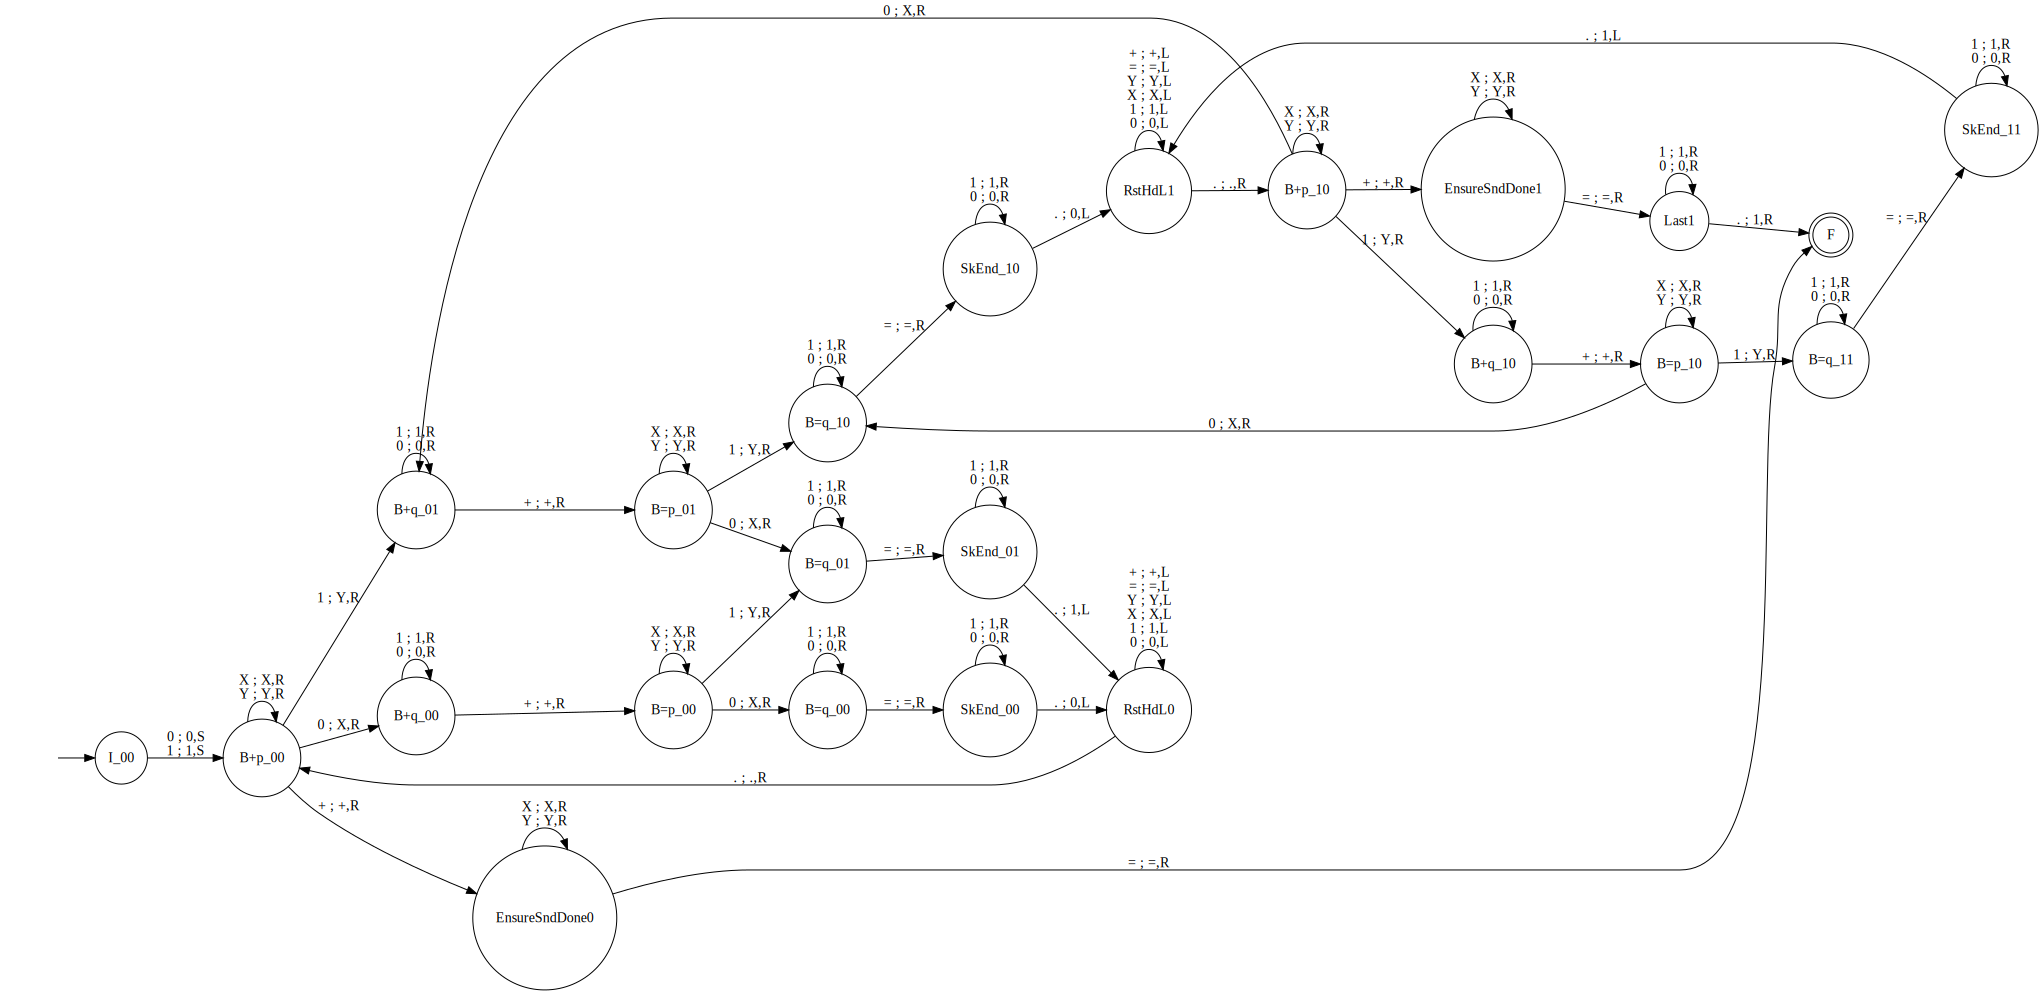

In [67]:
# The TM with input such as 

# 0101+0110= where 0101 and 0110 are presented little-endian


# Assume that the inputs will be padded to be the same length
#
# The example addition being performed is (written in the big-endian manner) is:
#
# 0110
# 1010
# ----
# 10000
#


# Algorithm : State design is of course key!
#
# We are also in various states. Here is how we name the states:
#
# B means before
# B+ means we are before the + 
# B= means we are before the =

# B+p means we are BEFORE the + 
#   as well as PRIOR to reading a 0 and changing it to an X or reading a 1 and changing it to a Y

# B+q means we are AFTER the + and after changing 0->X or 1->Y

# B=p and B=q have the same significance

# Finally the _00 or _01 or _10 or _11 means
# _<carry><sum>
# i.e. the present carry and the present sum are recorded after the underscore

addtm = md2mc('''TM 
 
I_00   : 0;0,S | 1;1,S  -> B+p_00 !! From init state, go to Before +, prior 

B+p_00 : 0;X,R          -> B+q_00  !! Change to Before +, after
B+p_00 : 1;Y,R          -> B+q_01

B+p_00 : X;X,R | Y;Y,R  -> B+p_00  !! Skip over X,Y
B+p_00 : +;+,R          -> EnsureSndDone0   !! Carry=0; Maybe addition is over; check second piece also "done"
 
B+p_10 : 0;X,R          -> B+q_01
B+p_10 : 1;Y,R          -> B+q_10

B+p_10 : X;X,R | Y;Y,R  -> B+p_10
B+p_10 : +;+,R          -> EnsureSndDone1   !! Carry=1; similar to EnsureSndDone0 otherwise

B+q_00 : 0;0,R  | 1;1,R -> B+q_00
B+q_00 : +;+,R          -> B=p_00  !! Move onto the "Before =" part

B+q_01 : +;+,R          -> B=p_01
B+q_01 : 0;0,R  | 1;1,R -> B+q_01

B+q_10 : 0;0,R  | 1;1,R -> B+q_10
B+q_10 : +;+,R          -> B=p_10

 
!!---

B=p_00 : X;X,R | Y;Y,R -> B=p_00  !! skip over the initial X and Y
B=p_00 : 0;X,R         -> B=q_00  !! We have reached the "after" part
B=p_00 : 1;Y,R         -> B=q_01
 
B=p_10 : X;X,R | Y;Y,R -> B=p_10
B=p_10 : 0;X,R         -> B=q_10
B=p_10 : 1;Y,R         -> B=q_11

B=q_11 : 0;0,R | 1;1,R -> B=q_11
B=q_11 : =;=,R         -> SkEnd_11

B=p_01 : X;X,R | Y;Y,R -> B=p_01
B=q_01 : =;=,R         -> SkEnd_01        !! Seeking end

B=q_00 : 0;0,R | 1;1,R -> B=q_00
B=q_00 : =;=,R         -> SkEnd_00

B=q_01 : 0;0,R | 1;1,R -> B=q_01
B=q_10 : 0;0,R | 1;1,R -> B=q_10

B=q_10 : =;=,R         -> SkEnd_10
B=p_01 : 0;X,R         -> B=q_01
B=p_01 : 1;Y,R         -> B=q_10

 
!!---

SkEnd_00 : 0;0,R | 1;1,R -> SkEnd_00
SkEnd_00 : .;0,L         -> RstHdL0   !! Reset head to the left; carry=0

SkEnd_01 : 0;0,R | 1;1,R -> SkEnd_01
SkEnd_01 : .;1,L         -> RstHdL0

SkEnd_10 : 0;0,R | 1;1,R -> SkEnd_10
SkEnd_10 : .;0,L         -> RstHdL1   !! Reset head to the left; carry=1

SkEnd_11 : 0;0,R | 1;1,R -> SkEnd_11
SkEnd_11 : .;1,L         -> RstHdL1

 
!!---

EnsureSndDone0 : X;X,R | Y;Y,R -> EnsureSndDone0 !! Ensure done, carry=0
EnsureSndDone0 : =;=,R         -> F       !! Yes, second piece also properly done

EnsureSndDone1 : X;X,R | Y;Y,R -> EnsureSndDone1 !! Ensure done, carry=1
EnsureSndDone1 : =;=,R         -> Last1          !! Must stick in last 1 in MSB of result

 
!!---
 
Last1 : 0;0,R | 1;1,R  -> Last1           !! Stick in 1 in MSB of result
Last1 : .;1,R          -> F               !! drain pending carry as there are no more bits to add


!!---

RstHdL0  : 0;0,L | 1;1,L | X;X,L | Y;Y,L | +;+,L | =;=,L -> RstHdL0
RstHdL1  : 0;0,L | 1;1,L | X;X,L | Y;Y,L | +;+,L | =;=,L -> RstHdL1

RstHdL0  : .;.,R -> B+p_00
RstHdL1  : .;.,R -> B+p_10

''')
DOaddtm = dotObj_tm(addtm, FuseEdges=True)
DOaddtm.render('addtm')
DOaddtm

In [68]:
explore_tm(addtm,"11+11=",100)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 17, '........YY+YY=011.....', 60)
 via .. 
 ->('I_00', 0, '11+11=', 100)
 ->('B+p_00', 0, '11+11=', 99)
 ->('B+q_01', 1, 'Y1+11=', 98)
 ->('B+q_01', 2, 'Y1+11=', 97)
 ->('B=p_01', 3, 'Y1+11=', 96)
 ->('B=q_10', 4, 'Y1+Y1=', 95)
 ->('B=q_10', 5, 'Y1+Y1=', 94)
 ->('SkEnd_10', 6, 'Y1+Y1=', 93)
 ->('RstHdL1', 5, 'Y1+Y1=0.......', 92)
 ->('RstHdL1', 4, 'Y1+Y1=0.......', 91)
 ->('RstHdL1', 3, 'Y1+Y1=0.......', 90)
 ->('RstHdL1', 2, 'Y1+Y1=0.......', 89)
 ->('RstHdL1', 1, 'Y1+Y1=0.......', 88)
 ->('RstHdL1', 0, 'Y1+Y1=0.......', 87)
 ->('RstHdL1', 7, '........Y1+Y1=0.......', 86)
 ->('B+p_10', 8, '........Y1+Y1=0.......', 85)
 ->('B+p_10', 9, '........Y1+Y1=0.......', 84)
 ->('B+q_10', 10, '........YY+Y1=0.......', 83)
 ->('B=p_10', 11, '........YY+Y1=0.......', 82)
 ->('B=p_10', 12, '........YY+Y1=0.......', 81)
 ->('B=q_11', 13, '........YY+YY=0.......', 80)
 -

In [69]:
explore_tm(addtm,"0101+0110=",140)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 23, '........XYXY+XYYX=00001...', 24)
 via .. 
 ->('I_00', 0, '0101+0110=', 140)
 ->('B+p_00', 0, '0101+0110=', 139)
 ->('B+q_00', 1, 'X101+0110=', 138)
 ->('B+q_00', 2, 'X101+0110=', 137)
 ->('B+q_00', 3, 'X101+0110=', 136)
 ->('B+q_00', 4, 'X101+0110=', 135)
 ->('B=p_00', 5, 'X101+0110=', 134)
 ->('B=q_00', 6, 'X101+X110=', 133)
 ->('B=q_00', 7, 'X101+X110=', 132)
 ->('B=q_00', 8, 'X101+X110=', 131)
 ->('B=q_00', 9, 'X101+X110=', 130)
 ->('SkEnd_00', 10, 'X101+X110=', 129)
 ->('RstHdL0', 9, 'X101+X110=0.......', 128)
 ->('RstHdL0', 8, 'X101+X110=0.......', 127)
 ->('RstHdL0', 7, 'X101+X110=0.......', 126)
 ->('RstHdL0', 6, 'X101+X110=0.......', 125)
 ->('RstHdL0', 5, 'X101+X110=0.......', 124)
 ->('RstHdL0', 4, 'X101+X110=0.......', 123)
 ->('RstHdL0', 3, 'X101+X110=0.......', 122)
 ->('RstHdL0', 2, 'X101+X110=0.......', 121)
 ->('RstHdL0', 1, 'X101+X110

In [70]:
explore_tm(addtm,"10000+11111=",200)

Allocating  8  tape cells to the RIGHT!
Allocating  8  tape cells to the LEFT!
Detailing the halted configs now.
Accepted at  ('F', 26, '........YXXXX+YYYYY=000001..', 31)
 via .. 
 ->('I_00', 0, '10000+11111=', 200)
 ->('B+p_00', 0, '10000+11111=', 199)
 ->('B+q_01', 1, 'Y0000+11111=', 198)
 ->('B+q_01', 2, 'Y0000+11111=', 197)
 ->('B+q_01', 3, 'Y0000+11111=', 196)
 ->('B+q_01', 4, 'Y0000+11111=', 195)
 ->('B+q_01', 5, 'Y0000+11111=', 194)
 ->('B=p_01', 6, 'Y0000+11111=', 193)
 ->('B=q_10', 7, 'Y0000+Y1111=', 192)
 ->('B=q_10', 8, 'Y0000+Y1111=', 191)
 ->('B=q_10', 9, 'Y0000+Y1111=', 190)
 ->('B=q_10', 10, 'Y0000+Y1111=', 189)
 ->('B=q_10', 11, 'Y0000+Y1111=', 188)
 ->('SkEnd_10', 12, 'Y0000+Y1111=', 187)
 ->('RstHdL1', 11, 'Y0000+Y1111=0.......', 186)
 ->('RstHdL1', 10, 'Y0000+Y1111=0.......', 185)
 ->('RstHdL1', 9, 'Y0000+Y1111=0.......', 184)
 ->('RstHdL1', 8, 'Y0000+Y1111=0.......', 183)
 ->('RstHdL1', 7, 'Y0000+Y1111=0.......', 182)
 ->('RstHdL1', 6, 'Y0000+Y1111=0.......', 181)
